In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)

ride_data = pd.read_csv(ride_data_to_load) 


# Combine the data into a single dataset

pyber_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview

pyber_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

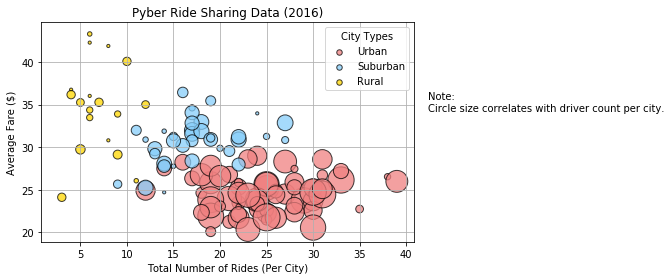

In [2]:
# Obtain the x and y coordinates for each of the three city types

pyber_data1 = pyber_data[['type','city','ride_id','fare','driver_count']]

df = pyber_data1.groupby(["type","city"])

x_axis_values = df['ride_id'].count()

y_axis_values = df['fare'].mean()

s_values = df['driver_count'].max()



# Build the scatter plots for each city types

a = plt.scatter(x_axis_values.loc['Urban'], y_axis_values.loc['Urban'], marker="o", c="lightcoral", 
            edgecolors="black", s=10*s_values.loc['Urban'], alpha=0.75, linewidths=1)

b = plt.scatter(x_axis_values.loc['Suburban'], y_axis_values.loc['Suburban'], marker="o", c="lightskyblue", 
            edgecolors="black", s=10*s_values.loc['Suburban'], alpha=0.75, linewidths=1)

c = plt.scatter(x_axis_values.loc['Rural'], y_axis_values.loc['Rural'], marker="o", c="gold", 
            edgecolors="black", s=10*s_values.loc['Rural'], alpha=0.75, linewidths=1)


# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend

lgnd = plt.legend((a,b,c),('Urban','Suburban','Rural'), fontsize = 10, title="City Types", loc="best")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.grid(True)

# Incorporate a text label regarding circle size

text_str = """Note:
Circle size correlates with driver count per city."""
plt.gcf().text(1, 0.6, text_str, fontsize=10)
plt.subplots_adjust(right=0.98)

# Save Figure

plt.tight_layout()

plt.savefig("../Images/bubble_plot.png")


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

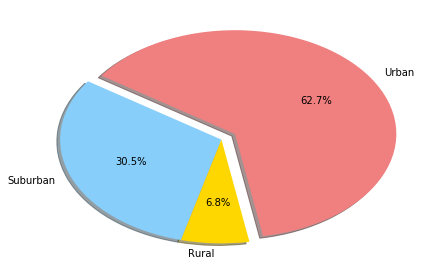

In [4]:
# Calculate Type Percents

df = pyber_data1.groupby(["type"])

Total_Fare = pyber_data["fare"].sum()

Fare_by_type_percent = (df["fare"].sum()/Total_Fare)*100

# Build Pie Chart

labels = ["Urban", "Suburban", "Rural"]

sizes = [Fare_by_type_percent.loc['Urban'], Fare_by_type_percent.loc['Suburban'], Fare_by_type_percent.loc['Rural']]

colors = ["lightcoral", "lightskyblue", "gold"]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=280)

# Save Figure

plt.tight_layout()

plt.savefig("../Images/fares_by_city_type.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

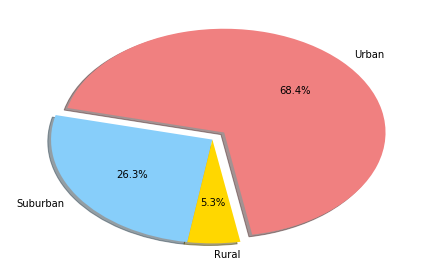

In [6]:
# Calculate Ride Percents

df = pyber_data1.groupby(["type"])

total_rides = pyber_data["ride_id"].count()

total_rides_city_type = df["ride_id"].count()

total_ride_percent = (total_rides_city_type/total_rides)*100

# Build Pie Chart

labels = ["Urban", "Suburban", "Rural"]

sizes = [total_ride_percent.loc['Urban'], total_ride_percent.loc['Suburban'], total_ride_percent.loc['Rural']]

colors = ["lightcoral", "lightskyblue", "gold"]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)

# Save Figure

plt.tight_layout()

plt.savefig("../Images/rides_by_city_type.png")


In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

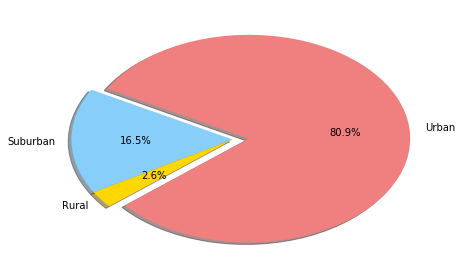

In [8]:
# Calculate Driver Percents

df = city_data.groupby(["type"])

total_drivers = city_data["driver_count"].sum()

total_drivers_city_type = df['driver_count'].sum()

driver_percent = (total_drivers_city_type/total_drivers)*100

# Build Pie Charts

labels = ["Urban", "Suburban", "Rural"]

sizes = [driver_percent.loc['Urban'], driver_percent.loc['Suburban'], driver_percent.loc['Rural']]

colors = ["lightcoral", "lightskyblue", "gold"]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=220)

# Save Figure

plt.tight_layout()

plt.savefig("../Images/drivers_by_city_type.png")


In [9]:
# Show Figure
plt.show()